In [21]:
import pandas as pd
import os 

In [22]:
fert = pd.read_csv('data/gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('data/gapminder_lifeexpectancy.xlsx', index_col=0)

In [23]:
fert.shape

(260, 216)

In [24]:
life.shape

(260, 217)

In [25]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [26]:
life.columns

Float64Index([1800.0, 1801.0, 1802.0, 1803.0, 1804.0, 1805.0, 1806.0, 1807.0,
              1808.0, 1809.0,
              ...
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0, 2016.0],
             dtype='float64', length=217)

In [27]:
fert.columns = fert.columns.astype(int)

In [28]:
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [29]:
fert.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'Åland'],
      dtype='object', name='Total fertility rate', length=260)

In [30]:
life.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'South Sudan'],
      dtype='object', name='Life expectancy', length=260)

In [31]:
fert.index.name = 'country'
fert = fert.reset_index()
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
fert.head()

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99


In [32]:
life.index.name = 'country'
life = life.reset_index()
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
life.head()

,country,year,life_expectancy
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,28.21
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,35.40
4,Algeria,1800.0,28.82


In [33]:
population = pd.read_excel('data/gapminder_population.xlsx', index_col=0)
#population.shape
#population.columns
#population.index
population.index.name = 'country'
population = population.reset_index()
population = population.melt(id_vars='country', var_name='year', value_name='population')
population.head()

,country,year,population
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,3280000.0
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,410445.0
4,Algeria,1800.0,2503218.0


In [34]:
#df = life.merge(population)
df = fert.merge(population)
df.head()

,country,year,fertility_rate,population
0,Abkhazia,1800,NaN,NaN
1,Afghanistan,1800,7.00,3280000.0
2,Akrotiri and Dhekelia,1800,NaN,NaN
3,Albania,1800,4.60,410445.0
4,Algeria,1800,6.99,2503218.0


In [35]:
df = life.merge(df)
df.head()

,country,year,life_expectancy,fertility_rate,population
0,Abkhazia,1800.0,NaN,NaN,NaN
1,Afghanistan,1800.0,28.21,7.00,3280000.0
2,Akrotiri and Dhekelia,1800.0,NaN,NaN,NaN
3,Albania,1800.0,35.40,4.60,410445.0
4,Algeria,1800.0,28.82,6.99,2503218.0


<AxesSubplot:xlabel='life_expectancy', ylabel='fertility_rate'>

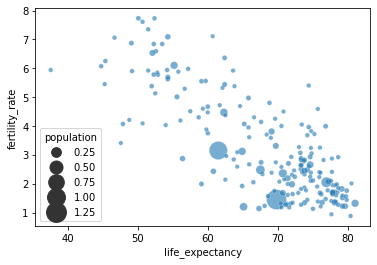

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset = df.loc[df['year'] == 2000]
sns.scatterplot(x='life_expectancy',
                y='fertility_rate',
                data=df_subset,
                alpha=0.6,
                size = 'population',
                sizes= (20,400)
                )

In [37]:

for year in range(1961,2016):
    df_subset = df.loc[df['year'] == year]
    #sns.scatterplot(x='life_expectancy', y='fertility_rate',
    #        data=df_subset, alpha=0.6)
    sns.scatterplot(x='life_expectancy',
                y='fertility_rate',
                data=df_subset,
                alpha=0.6,
                size = 'population',
                sizes= (20,400)
                )
    plt.title('Life expectancy vs fertility evolution from 1961 to 2016')
    plt.axis((20, 100, 0, 10))
    plt.savefig(f'{year}.png')
    plt.close()


In [38]:
#!pip install imageio
import imageio

images = []

for i in range(1961,2016):
    filename = '{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=20)
for year in range(1961,2016):
    os.remove(f'{year}.png')
    
